<a href="https://colab.research.google.com/github/FrancieNagiki/cs24-h03/blob/master/Copy_of_CS_ECE_181_Programming_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS/ECE 181: Programming Assignment 1

**DUE DATE**: January 24, 11:59pm Pacific via GauchoSpace

* You can save a copy of this document in your own Drive and work on it in your own Colab
* When you're done, select "Download .ipynb" and drop the file in the Programming Assignment #1 folder on GauchoSpace.
* You can add comments, multiple cells, etc. Just make sure to explain what you did so that we can give you partial credit.
* Remember, you are expected to work alone. You can discuss a solution approach with your peers, but you must not copy their code. The implementation must be yours. If you google how to do stuff (or use open-source code or libraries) you must acknowledge your sources.


## 0. Getting Started


### Introduction

For those of you who are new to Jupyter Notebook / Google Colab, here's a quick crashcourse.

Colab is a cloud host for [Jupyter Notebook](https://realpython.com/jupyter-notebook-introduction/), allowing you to write Python code in your browser. If you host a Juputer Notebook locally, you can configure it to run [C++](https://blog.jupyter.org/interactive-workflows-for-c-with-jupyter-fe9b54227d92) or [MATLAB](https://am111.readthedocs.io/en/latest/jmatlab_install.html), too.

The cool thing about Colab is that it comes pre-installed with lots of [libraries for scientific computing](https://stackoverflow.com/questions/47109539/what-are-the-available-libraries-within-google-colaboratory), and it stores a copy of your notebook in GDrive.

One thing to note is that your Notebook will go offline after it stays idle for a while. So every time you open the Notebook (or after time-out), you will have to run all your code cells again (this includes importing your libraries).

### Executing Python code

You can run any valid Python code in the code cells of the Notebook. For example:


In [150]:
2 + 2

4

You can execute the cell by clicking on the "Play" button.

Alternatively, you can use a keyboard shortcut:

- `Ctrl+Enter`: execute the cell
- `Shift+Enter`: execute the cell and select the next cell below it (create one if necessary)

You can see all Keyboard Shortcuts by going to "Tools > Keyboard shortcuts".

Other useful commands include (click into a cell first):

- `Esc+A`: create a cell above the current one
- `Esc+B`: create a cell below the current one
- `Ctrl+M+D`: delete the current cell

Try it!

### Other useful stuff

Colab will give you hints about a function's use. This happens automatically while you're typing. Try it yourself:

First, import NumPy (numerical python, with lots of math functions).
It's customary to import it with an alias "np" so that you don't always have to type "numpy":

In [151]:
import numpy as np

After that, let's try to call the sine function, but let's pretend we forgot what it does. Start typing "np.sin(" but then wait for a second - a window should pop up that shows you the docstring for this function. It will tell you what the function does and which arguments it accepts:

In [152]:
np.sin(10)

-0.5440211108893698

### Important

Jupyter Notebooks use a global workspace. This means that if you define a variable (e.g., `a=1`), then from that point in time forward, `a` will be defined globally in the notebook.

This means that you can (accidentally) define a variable in the last cell of the notebook, and when you re-execute a previous cell, the variable will still be defined. So be careful when designing notebooks to execute stuff from top to bottom.

Before turning something in, it is therefore a good idea to select "Runtime > Restart and run all". This will make sure that your notebook runs correctly top to bottom.

# 1. Loading images

In this assignment, we will be using [scikit-image](https://scikit-image.org/) for our image processing needs.

It comes pre-installed with Colab, so you can just import it. 
However, scikit-image is built such that you want to import just the things you need. For example, instead of typing

    import skimage

or even worse:

    from skimage import *

it is customary to import just the functions you need (so as not to clutter up your Python workspace).

There are a number of example images in [skimage.data](https://scikit-image.org/docs/0.3/api/scikits.image.data.html)

In [153]:
from skimage import data as example_images

You might recognize the following picture from lecture. We can use Matplotlib to plot the image (using colormap 'grayscale').

I encourage you to explore the other images in `example_images`.

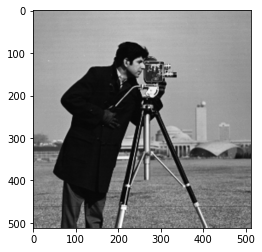

In [154]:
camera_man = example_images.camera()

import matplotlib.pyplot as plt
plt.imshow(camera_man, cmap='gray')

We can inspect `camera_man` to see that it is a 512x512 grayscale image with gray levels 0-255 (dtype 'uint8'):

In [155]:
camera_man.shape, camera_man.dtype

((512, 512), dtype('uint8'))

# 2. Filtering images

One example from the lecture that caused a little bit of confusion is the filter that supposedly shifts an image to the left.

Using SciPy's [convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) function, we can now convince ourselves that the filter presented in lecture really shifts the image to the left:

In [156]:
import numpy as np
kernel = np.array([[0, 0, 0],
                   [1, 0, 0],
                   [0, 0, 0]])

(-0.5, 511.5, 511.5, -0.5)

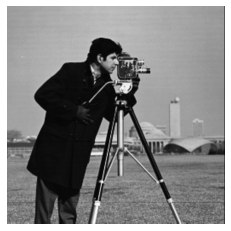

In [157]:
from scipy.signal import convolve2d

# IMPORTANT: Always use mode='same' to make the output same size as your input image:
conv_img = convolve2d(camera_man, kernel, mode='same')

# You should see all black pixels in the rightmost column:
plt.imshow(conv_img, cmap='gray')
plt.axis('off')

It's a little hard to see, but we can zoom in on the bottom corner to convince ourselves there's a column of black pixels:

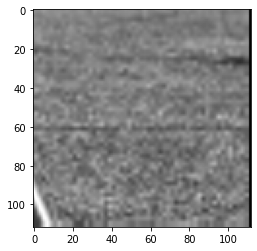

In [158]:
plt.imshow(conv_img[400:, 400:], cmap='gray')

## 1.1 TODO: Write a kernel that shifts an image 1 pixel up (1pt)

In [159]:
kernel = np.array([[0, 1, 0],
                   [0, 0, 0],
                   [0, 0, 0]])

(-0.5, 511.5, 511.5, -0.5)

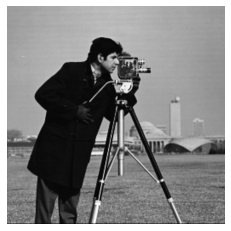

In [160]:
conv_img = convolve2d(camera_man, kernel, mode='same')
plt.imshow(conv_img, cmap='gray')
plt.axis('off')

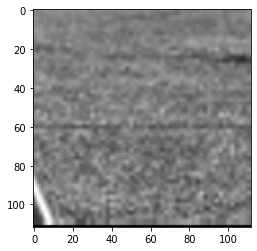

In [161]:
# Zoom in on the bottom-right corner to show that there's a row of
# black pixels at the bottom, but no more black pixels on the right:
plt.imshow(conv_img[400:, 400:], cmap='gray')

## 1.2 TODO: Shift an image 2 pixels up & 2 pixels to the left (2pts)

How would you write a kernel that shifts an image both up and to the left? This time, we want to shift the image 2 pixels up and 2 pixels to the left.

In [162]:
kernel = np.array([[1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0]])

(-0.5, 511.5, 511.5, -0.5)

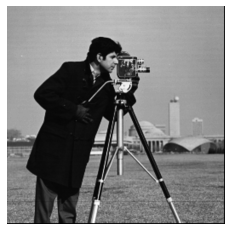

In [163]:
conv_img = convolve2d (camera_man, kernel, mode='same')
plt.imshow(conv_img, cmap='gray')
plt.axis('off')

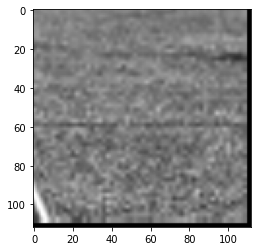

In [164]:
# Zoom in on the bottom-right corner to show that there's now
# a 2px-wide black border:
plt.imshow(conv_img[400:, 400:], cmap='gray')

# 2. Sobel Operator

In this section, we want to implement our own Sobel operator.

## 2.1 TODO: Find the horizontal edges in the image (1pt)

First step is to write a Sobel filter that detects horizontal edges in the image:

In [165]:
sobel_y = np.array([[ 1, 2, 1],
                    [ 0, 0, 0],
                    [-1,-2,-1]])/8
img_sobel_y = convolve2d (camera_man, sobel_y, mode='same')

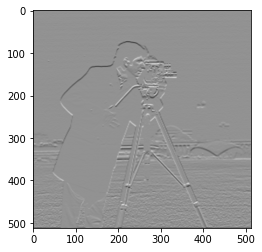

In [166]:
plt.imshow(img_sobel_y, cmap='gray')

You can compare your result to the one returned by scikit-image.

However, your result will likely be different from the official implementation, because:
- we are operating on ubit images, they are operating on float images
- their filter might use the opposite sign
- they might also normalize the image in an interesting way

But your result should qualitatively look the same as this:

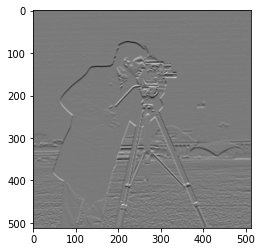

In [167]:
from skimage.filters import sobel_h
plt.imshow(sobel_h(camera_man), cmap='gray')

## 2.2 TODO: Find the vertical edges in the image (1pt)

Now repeat the same thing for the vertical edges:

In [168]:
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])/8
img_sobel_x = convolve2d (camera_man, sobel_x, mode='same')

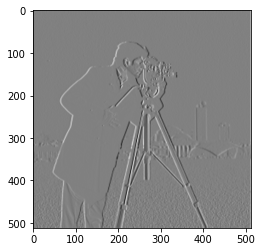

In [169]:
plt.imshow(img_sobel_x, cmap='gray')

## 2.3 TODO: Put the two together to calculate edge magnitude (1pt)

The last step is to put the two directional derivatives together to calculate edge magnitude. The result should look qualitatively similar to [`skimage.filters.sobel`](https://scikit-image.org/docs/0.3/api/scikits.image.filter.html#sobel).

Hint: You can use `*` or `np.multiply` for element-wise multiplicaton of two matrices.

In [170]:
img_sobel = np.sqrt(img_sobel_x * img_sobel_x + img_sobel_y * img_sobel_y)

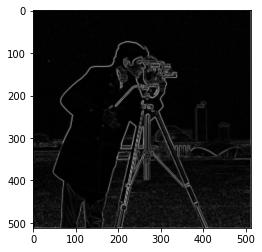

In [171]:
plt.imshow(img_sobel, cmap='gray')

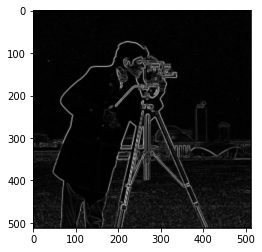

In [172]:
# Compare (qualitatively) to the skimage solution:
from skimage.filters import sobel
plt.imshow(sobel(camera_man), cmap='gray')

# 3. Fourier transform

In this section, we want to implement the Fourier transform of an image. We will use NumPy's version of the Fast Fourier Transform (FFT).

First, apply FFT to the camera man image:

In [173]:
camera_fft = np.fft.fft2(camera_man)

We can inspect the result to see that we're dealing with a 512x512 matrix of complex values:

In [174]:
camera_fft.shape, camera_fft.dtype

((512, 512), dtype('complex128'))

For `A = fft(a, n)`, `A[0]` contains the zero-frequency term which is the mean of the signal. It is always purely real for real inputs.

`A[1:n/2]` contain the positive-frequency terms.

`A[n/2 + 1:]` contain the negative-frequency terms in the order of decreasing negative frequency.

Fun fact: `A[n/2]` represents both the Nyquist frequency (for an even number of inputs). It is also purely real for real input.

In a 2D transform, the output is 2D as well - where the above applies to each axis (rows and columns).

OK. We can plot the amplitude spectrum by taking the `abs`. Values might be large, so let's take the log so `imshow` does not get upset:

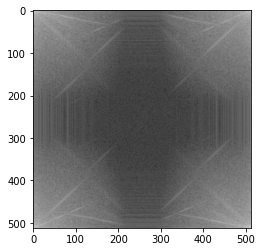

In [175]:
plt.imshow(np.log(np.abs(camera_fft)), cmap='gray')

Like I explained in the lecture, it is often customary to shift the spectrum so that the zero-frequency term lies in the center of the image:

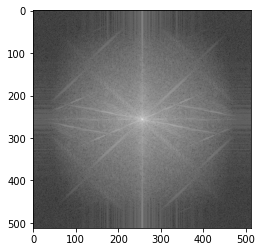

In [176]:
fft_amp = np.fft.fftshift(camera_fft)
plt.imshow(np.log(np.abs(fft_amp)), cmap='gray')

## 3.1 TODO: Implement a low-pass filter in Fourier space (4pts)

Now we want to implement a low-pass filter by manipulating the amplitude spectrum.

So the first step is to set large amplitudes to zero. For this, we need to build a mask that is one within some small distance away from the image center, and zero everywhere else (see Slide 20 of Fundamentals).
A radius of 30 pixels should be fine.

Hint: You can use `np.meshgrid` to create an array of the x and y coordinates of the image:

In [177]:
y, x = np.meshgrid(np.arange(fft_amp.shape[0]), np.arange(fft_amp.shape[1]))

In [178]:
# You also want to store the x,y location of the image center:
center_y, center_x = fft_amp.shape[0]/2, fft_amp.shape[1]/2

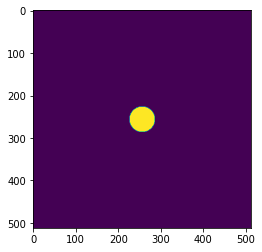

In [179]:
mask = np.zeros((fft_amp.shape[0],fft_amp.shape[1]),np.uint8)
for i in range(fft_amp.shape[0]):
  for j in range(fft_amp.shape[0]):
    if (pow(center_y-j,2)+pow(center_x-i,2)<900):
      mask[i,j]=1
plt.imshow(mask)

Now you need to apply the mask to the Fourier spectrum:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


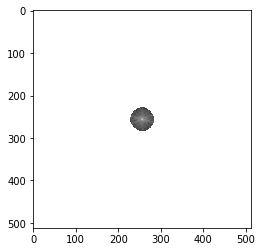

In [180]:
fft_masked = fft_amp * mask
plt.imshow(np.log(np.abs(fft_masked)), cmap='gray')

Then you need revert all the steps of the Fourier transform to get a real image back.

Hint: Check the NumPy FFT docs for the inverse functions.

In [181]:
filtered_image = np.fft.ifft2(np.fft.ifftshift(fft_masked))

The resulting image should be a smoothed image of the original.

However, periodic artifacts are apparent. Because we are operating in frequency space, any components we add or remove are also of periodic nature.
Hence, there are better ways to smooth an image.

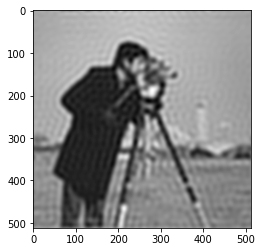

In [182]:
# Result might be complex numbers, so show real parts:
plt.imshow(np.real(filtered_image),cmap="gray")

# 4. Marr-Hildreth edge algorithm

Finally, we want to implement the Marr-Hildreth edge algorithm. The algorithm is divided into two steps:
- Convolution of the image with:
   - a Laplacian of a Gaussian (LoG) kernel, or
   - a Gaussian kernel and then a Laplacian operator
- Search of zero crossing points in the filtered image


## 4.1 TODO: Gaussian kernel (2pts)


First, you will need to write a function to create a pyramid of Gaussian filter masks. These masks should have progressively larger sigma of 3, 6, 12, 24, and 48 pixels.

(Note that the discrete filters should cover at least 1 sigma of the continuous Gaussian function, which means that the filter size is not a constant and should increase with sigma.)

So you should have 5 Gaussian kernels:

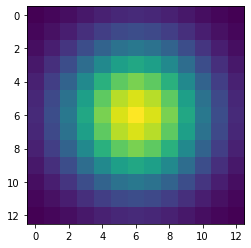

In [183]:
def gaussian_kernels(sigma):
  kernel=np.zeros((sigma*4+1,sigma*4+1))
  for i in range(sigma*4+1):
    for j in range(sigma*4+1):
      u=i-sigma*2
      v=j-sigma*2
      kernel[i,j]=np.exp(-(u*u+v*v)/2/sigma/sigma)
  return kernel
sigma3=gaussian_kernels(3)
sigma6=gaussian_kernels(6)
sigma12=gaussian_kernels(12)
sigma24=gaussian_kernels(24)
sigma48=gaussian_kernels(48)
plt.imshow(sigma3)

## 4.2 TODO: Laplacian of a Gaussian (2 pts)

Convolve the pyramid of the Gaussian masks witgh a Laplacian operator mask to generate the Laplacian of a Gaussian (LoG, aka "Mexican Hat").

Then convolve the 5 LoG operators with your input image (so you should get 5 filtered images out):

Text(0.5, 1.0, 'sigma=48')

<Figure size 432x288 with 0 Axes>

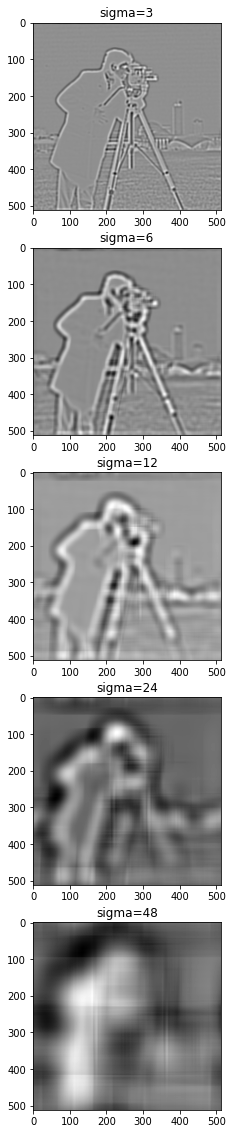

In [184]:
from scipy import ndimage
LoG3=ndimage.filters.laplace(sigma3)
LoG6=ndimage.filters.laplace(sigma6)
LoG12=ndimage.filters.laplace(sigma12)
LoG24=ndimage.filters.laplace(sigma24)
LoG48=ndimage.filters.laplace(sigma48)
filtered_3=convolve2d(camera_man,LoG3,mode="same",boundary="wrap")
filtered_6=convolve2d(camera_man,LoG6,mode="same",boundary="wrap")
filtered_12=convolve2d(camera_man,LoG12,mode="same",boundary="wrap")
filtered_24=convolve2d(camera_man,LoG24,mode="same",boundary="wrap")
filtered_48=convolve2d(camera_man,LoG48,mode="same",boundary="wrap")
plt.figure()
fig, Result_of_LoG = plt.subplots(5,1,figsize=(20,20))
Result_of_LoG[0].imshow(filtered_3, cmap='gray')
Result_of_LoG[0].set_title('sigma=3')
Result_of_LoG[1].imshow(filtered_6, cmap='gray')
Result_of_LoG[1].set_title('sigma=6')
Result_of_LoG[2].imshow(filtered_12, cmap='gray')
Result_of_LoG[2].set_title('sigma=12')
Result_of_LoG[3].imshow(filtered_24, cmap='gray')
Result_of_LoG[3].set_title('sigma=24')
Result_of_LoG[4].imshow(filtered_48, cmap='gray')
Result_of_LoG[4].set_title('sigma=48')

## 4.3 TODO: Zero crossings (4pts)

Finally, detect the zero-crossings (not zeros!) in the filtered images as your edge points. 

A zero crossing at pixel implies that the signs of at least two opposite neighboring pixels are different. There are four cases to test: left/right, up/down, and the two diagonals (up-left/down-right and up-right/down-left).

A pixel is considered an edge pixel if any of the following conditions are true:
- the sign of the left/right neighbors is opposite AND the difference between their gray levels is greater than `threshold`
- the sign of the up/down neighbors is opposite AND the difference between their gray levels is greater than `threshold`
- the sign of the up-left/down-right neighbors is opposite AND the difference between their gray levels is greater than `threshold`
- the sign of the up-right/down-left neighbors is opposite AND the difference between their gray levels is greater than `threshold`

It is easiest to put all this logic in a function. The function should accept a filtered image `img` and a threshold `threshold`. The function should return 1 for edge pixels and 0 elsewhere.

In [185]:
def zero_detect(img,threshold,x,y):
  edge=0
  if (img[x-1,y]*img[x+1,y]<0) and (abs(img[x-1,y]-img[x+1,y])>threshold):
    edge=1
  if (img[x,y-1]*img[x,y+1]<0) and (abs(img[x,y-1]-img[x,y+1])>threshold):
    edge=1
  if (img[x-1,y-1]*img[x+1,y+1]<0) and (abs(img[x-1,y-1]-img[x+1,y+1])>threshold):
    edge=1
  if (img[x+1,y-1]*img[x-1,y+1]<0) and (abs(img[x+1,y-1]-img[x-1,y+1])>threshold):
    edge=1
  return edge

Then apply the function to the 5 different filtered images to get 5 binary edge maps back.

Experiment with different values of `threshold` to get a good result.
The result should look something like the Canny edge detector: white lines on a black image. You can also google for example of images of the Marr-Hildreth edge detector.

You should see that the edges in the 5 filtered image depend on the sigma of the Gaussian kernel.

Text(0.5, 1.0, 'sigma=48, threshold=1')

<Figure size 432x288 with 0 Axes>

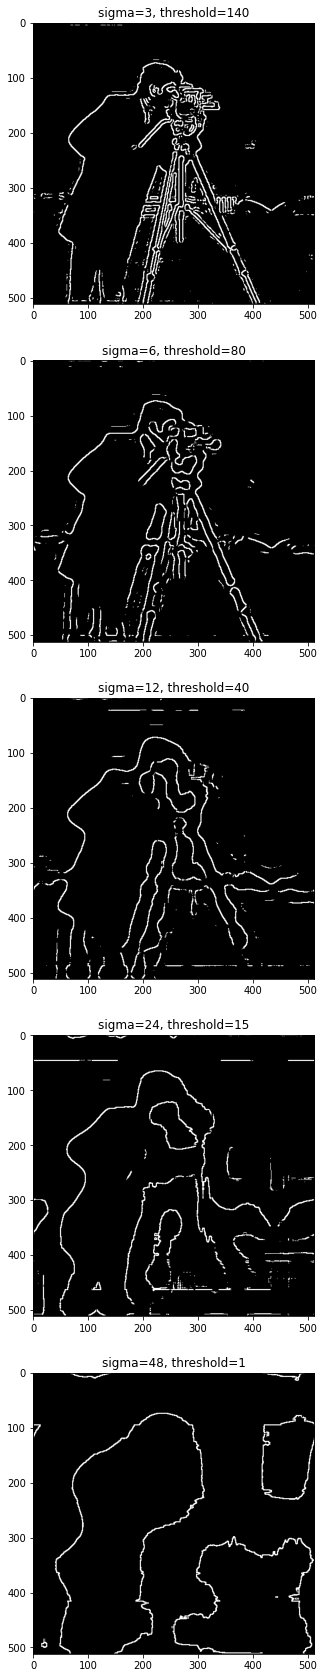

In [186]:
def generate_binary(img,threshold):
  binary_edge_map=np.zeros(filtered_3.shape)
  for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
      binary_edge_map[i,j]=zero_detect(img,threshold,i,j)
  return binary_edge_map
threshold_3=140
threshold_6=80
threshold_12=40
threshold_24=15
threshold_48=1
binary_edge_map_3=generate_binary(filtered_3,threshold_3)
binary_edge_map_6=generate_binary(filtered_6,threshold_6)
binary_edge_map_12=generate_binary(filtered_12,threshold_12)
binary_edge_map_24=generate_binary(filtered_24,threshold_24)
binary_edge_map_48=generate_binary(filtered_48,threshold_48)
plt.figure()
fig, Result_of_LoG = plt.subplots(5,1,figsize=(30,30))
Result_of_LoG[0].imshow(binary_edge_map_3, cmap='gray')
Result_of_LoG[0].set_title("sigma=3, threshold="+str(threshold_3))
Result_of_LoG[1].imshow(binary_edge_map_6, cmap='gray')
Result_of_LoG[1].set_title("sigma=6, threshold="+str(threshold_6))
Result_of_LoG[2].imshow(binary_edge_map_12, cmap='gray')
Result_of_LoG[2].set_title("sigma=12, threshold="+str(threshold_12))
Result_of_LoG[3].imshow(binary_edge_map_24, cmap='gray')
Result_of_LoG[3].set_title("sigma=24, threshold="+str(threshold_24))
Result_of_LoG[4].imshow(binary_edge_map_48, cmap='gray')
Result_of_LoG[4].set_title("sigma=48, threshold="+str(threshold_48))